In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [2]:
lb=preprocessing.LabelBinarizer()

In [3]:
lb.fit(np.array([1,9,4,2,7,0]))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [4]:
lb.classes_

array([0, 1, 2, 4, 7, 9])

In [5]:
lb.y_type_

'multiclass'

In [6]:
lb.sparse_input_

False

In [7]:
lb.get_params()

{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

In [8]:
lb.transform(np.array([0,1,4]))

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [9]:
lb2=preprocessing.LabelBinarizer()

In [10]:
lb2.fit(np.array(['y','n','n','y']))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [11]:
lb2.classes_

array(['n', 'y'],
      dtype='|S1')

In [12]:
lb2.y_type_

'binary'

In [13]:
lb2.transform(np.array(['y','y','n','y','n','f']))

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0]])

In [14]:
lb3=preprocessing.LabelBinarizer()

In [15]:
lb3.fit(np.matrix([[0,0,1,1],[1,0,1,0]]))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [16]:
lb3.classes_

array([0, 1, 2, 3], dtype=int64)

In [17]:
lb3.y_type_

'multilabel-indicator'

In [18]:
lb3.sparse_input_

False

In [19]:
lb3.transform(np.array([1,2,3,0,4]))

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0]])

In [20]:
lb3.inverse_transform(np.array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]]))

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

In [21]:
lb.inverse_transform(np.array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]]))

array([0, 1, 4])

In [22]:
lb2.inverse_transform(np.array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0]]))

array(['y', 'y', 'n', 'y', 'n', 'n'],
      dtype='|S1')

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [24]:
le.classes_

array([1, 2, 6])

In [25]:
le.transform([1, 1, 2, 6]) 



array([0, 0, 1, 2], dtype=int64)

In [26]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

In [27]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [28]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [29]:
le.transform(["tokyo", "tokyo", "paris"]) 

array([2, 2, 1], dtype=int64)

In [30]:
list(le.inverse_transform([2, 2, 1,0]))

['tokyo', 'tokyo', 'paris', 'amsterdam']

In [31]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)   

0.91300000000000003

In [32]:
pre=clf.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pre)

array([[4657,  392],
       [ 478, 4473]], dtype=int64)

In [34]:
clf.decision_function(X_test)

array([ 0.53176404, -3.5939494 , -3.35731914, ..., -3.72936885,
        0.34762483,  2.6083505 ])

In [35]:
pre[:10]

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.])

In [36]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [37]:
f1_score(y_test,pre)

0.9113691931540342

In [38]:
precision_score(y_test,pre)

0.91942446043165471

In [39]:
recall_score(y_test,pre)

0.90345384770753379

In [40]:
decision_scores=clf.predict_proba(X_test)

In [41]:
decision_scores.min()

3.6230130007197658e-11

In [42]:
decision_scores.max()

0.99999999996376987

In [43]:
###绘制精准率和召回率曲线

In [44]:
scores=clf.decision_function(X_test)
thresholds=np.arange(scores.min(),scores.max(),0.1)
recalls=[]
precisions=[]
for threshold in thresholds:
    pre=np.array(scores>=threshold,dtype='int')
    pre[pre==0]=-1
#     print pre
    recalls.append(recall_score(y_test,pre))
    precisions.append(precision_score(y_test,pre))
    

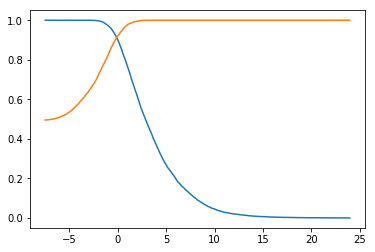

In [45]:
plt.plot(thresholds,recalls)
plt.plot(thresholds,precisions)
plt.show()

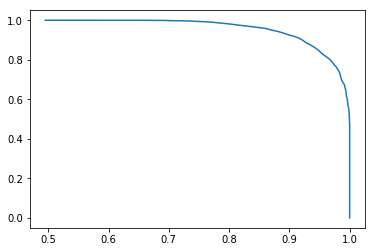

In [46]:
plt.plot(precisions,recalls)
plt.show()

In [47]:
from sklearn.metrics import precision_recall_curve

In [48]:
pre,rec,thre=precision_recall_curve(y_test,scores)

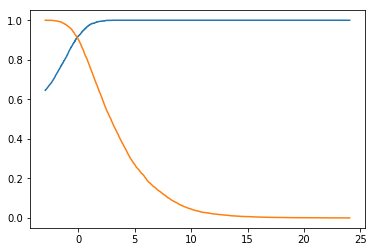

In [49]:
plt.plot(thre,pre[:-1])
plt.plot(thre,rec[:-1])
plt.show()

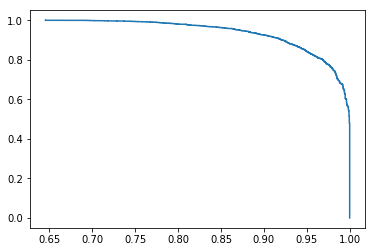

In [50]:
plt.plot(pre,rec)
plt.show()

### ROC曲线（Receiver Operation Characteristic Curve)|描述FPR和FPR之间的关系
TPR=TP/TP+FN

FPR=FP/FP+TN

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fprs,tprs,thres=roc_curve(y_test,scores)

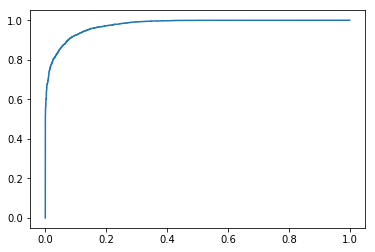

In [53]:
plt.plot(fprs,tprs)
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_test,scores)

0.97641161457146353